In [33]:
import pathlib

In [34]:
import numpy as np

In [35]:
from fastai.vision import (
    ImageList, 
    cnn_learner,
    models,
    error_rate,
    get_transforms, 
    imagenet_stats,
    ClassificationInterpretation
)

In [36]:
import torch
torch.cuda.is_available()

True

In [5]:
chrono_images_path = pathlib.Path('E:/WebDev/WatchPrediction/data/images');

In [6]:
np.random.seed(42)

In [7]:
data = (
    ImageList.from_folder(chrono_images_path)
    .split_by_rand_pct()
    .label_from_re(r'.*\/(.+)-.+-.+.jpg')
    .transform(get_transforms())
    .databunch()
    .normalize(imagenet_stats)
)

The data is split into brand _ index _ price . jpg for each, So labeling from regular expressions, then applying basic get_transforms from fastai we can create a wholistic dataset

In [8]:
data

ImageDataBunch;

Train: LabelList (4814 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
alangesoehne,alangesoehne,alangesoehne,alangesoehne,alangesoehne
Path: E:\WebDev\WatchPrediction\data\images;

Valid: LabelList (1203 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
cartier,zenith,chronoswiss,chronoswiss,chopard
Path: E:\WebDev\WatchPrediction\data\images;

Test: None

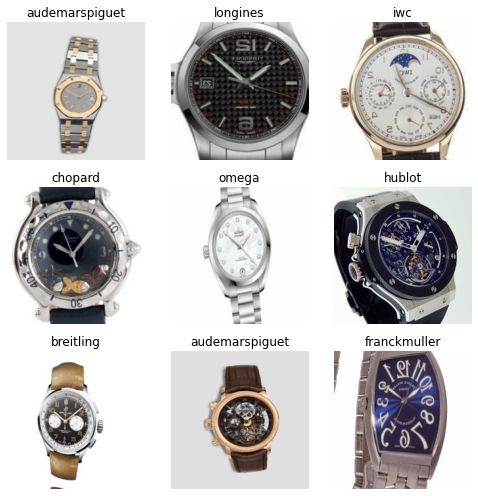

In [9]:
data.show_batch(rows=3, figsize=(7,7))

In [10]:
data.classes

['alangesoehne',
 'audemarspiguet',
 'bellross',
 'blancpain',
 'breitling',
 'cartier',
 'chopard',
 'chronoswiss',
 'franckmuller',
 'girardperregaux',
 'glashuetteoriginal',
 'hublot',
 'iwc',
 'jaegerlecoultre',
 'longines',
 'mauricelacroix',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'sinn',
 'tagheuer',
 'tudor',
 'zenith']

In [11]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.988513,2.485388,0.667498,00:48
1,2.975245,2.042703,0.551122,00:46
2,2.355875,1.845717,0.512053,00:45
3,2.008000,1.800416,0.502078,00:44
4,1.744768,1.699969,0.475478,00:44
5,1.544144,1.604271,0.437240,00:44
6,1.406749,1.569697,0.443059,00:44
7,1.253091,1.511383,0.419784,00:44
8,1.138955,1.515161,0.416459,00:44
9,1.081453,1.499975,0.418953,00:45


In [13]:
interpretation = ClassificationInterpretation.from_learner(learner)

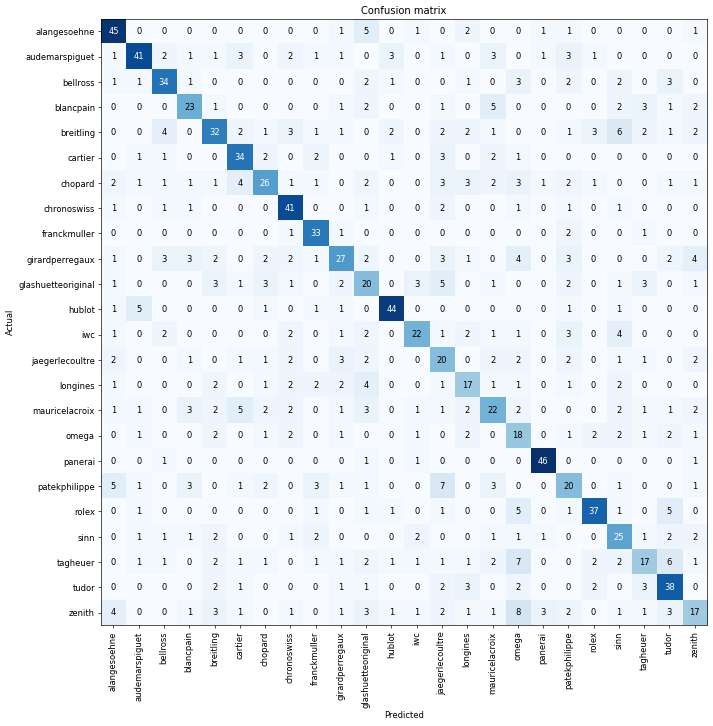

In [14]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

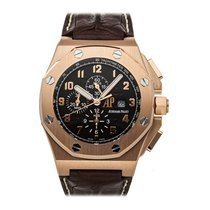

In [15]:
data.valid_ds[108][0]

In [16]:
list(zip(data.classes, learner.predict(data.valid_ds[108][0])[2]))

[('alangesoehne', tensor(2.2160e-05)),
 ('audemarspiguet', tensor(0.0763)),
 ('bellross', tensor(0.0002)),
 ('blancpain', tensor(2.4348e-05)),
 ('breitling', tensor(7.5242e-05)),
 ('cartier', tensor(3.4663e-06)),
 ('chopard', tensor(1.0632e-06)),
 ('chronoswiss', tensor(1.5542e-07)),
 ('franckmuller', tensor(1.2516e-05)),
 ('girardperregaux', tensor(3.4544e-05)),
 ('glashuetteoriginal', tensor(1.7534e-06)),
 ('hublot', tensor(0.9213)),
 ('iwc', tensor(0.0012)),
 ('jaegerlecoultre', tensor(0.0003)),
 ('longines', tensor(9.9207e-06)),
 ('mauricelacroix', tensor(2.5519e-06)),
 ('omega', tensor(9.7570e-05)),
 ('panerai', tensor(1.4123e-06)),
 ('patekphilippe', tensor(0.0002)),
 ('rolex', tensor(2.1816e-05)),
 ('sinn', tensor(9.8149e-06)),
 ('tagheuer', tensor(6.4119e-05)),
 ('tudor', tensor(0.0002)),
 ('zenith', tensor(2.2544e-05))]

In [17]:
learner.save('stage-1')

In [18]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


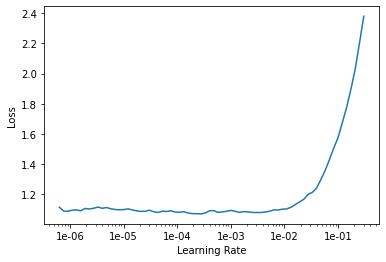

In [19]:
learner.recorder.plot()

In [20]:
learner.unfreeze()

In [21]:
learner.fit_one_cycle(30, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.178908,1.403450,0.374896,00:52
1,1.018929,1.435682,0.376559,00:51
2,1.079708,1.867535,0.476309,00:50
3,1.227749,1.702475,0.435578,00:50
4,1.309154,1.881576,0.442228,00:50
5,1.322165,2.443321,0.552785,00:49
6,1.309374,2.388530,0.517041,00:50
7,1.143821,1.820830,0.463009,00:51
8,1.056750,1.965599,0.454697,00:50
9,0.946044,1.775365,0.397340,00:50


In [22]:
interpretation = ClassificationInterpretation.from_learner(learner)

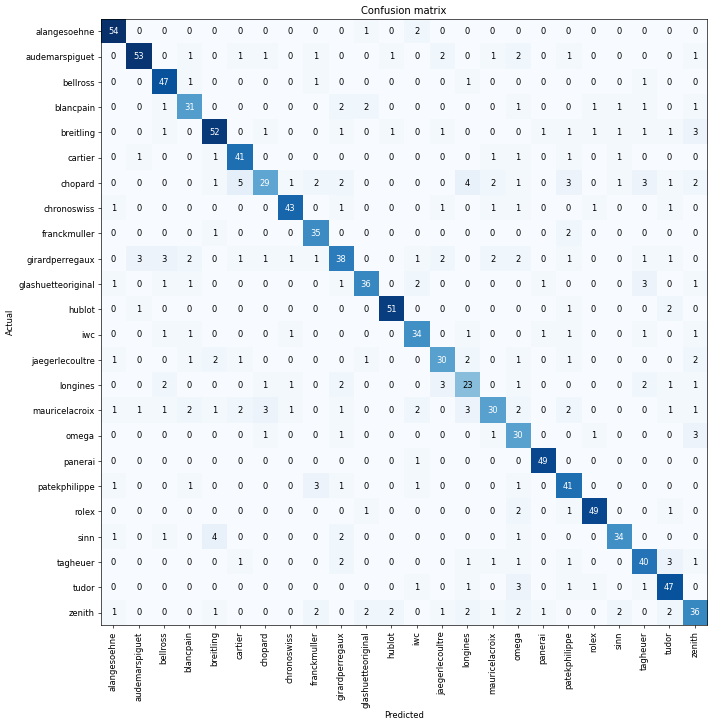

In [23]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interpretation.most_confused(min_val=2)

[('chopard', 'cartier', 5),
 ('chopard', 'longines', 4),
 ('sinn', 'breitling', 4),
 ('breitling', 'zenith', 3),
 ('chopard', 'patekphilippe', 3),
 ('chopard', 'tagheuer', 3),
 ('girardperregaux', 'audemarspiguet', 3),
 ('girardperregaux', 'bellross', 3),
 ('glashuetteoriginal', 'tagheuer', 3),
 ('longines', 'jaegerlecoultre', 3),
 ('mauricelacroix', 'chopard', 3),
 ('mauricelacroix', 'longines', 3),
 ('omega', 'zenith', 3),
 ('patekphilippe', 'franckmuller', 3),
 ('tagheuer', 'tudor', 3),
 ('tudor', 'omega', 3),
 ('alangesoehne', 'iwc', 2),
 ('audemarspiguet', 'jaegerlecoultre', 2),
 ('audemarspiguet', 'omega', 2),
 ('blancpain', 'girardperregaux', 2),
 ('blancpain', 'glashuetteoriginal', 2),
 ('chopard', 'franckmuller', 2),
 ('chopard', 'girardperregaux', 2),
 ('chopard', 'mauricelacroix', 2),
 ('chopard', 'zenith', 2),
 ('franckmuller', 'patekphilippe', 2),
 ('girardperregaux', 'blancpain', 2),
 ('girardperregaux', 'jaegerlecoultre', 2),
 ('girardperregaux', 'mauricelacroix', 2),
 (

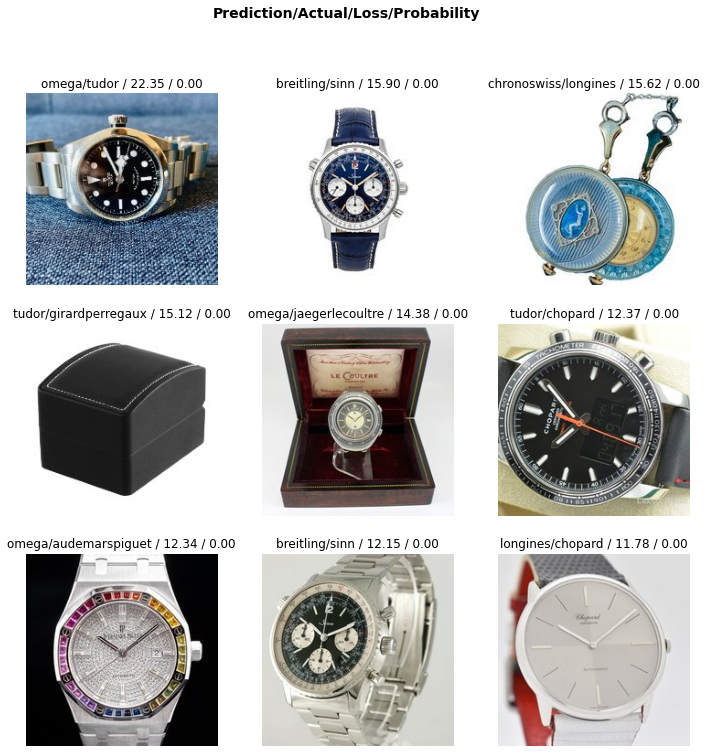

In [25]:
interpretation.plot_top_losses(9, figsize=(12,12))

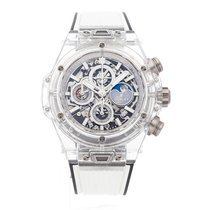

In [27]:
data.valid_ds[10][0]

In [28]:
list(zip(data.classes, learner.predict(data.valid_ds[10][0])[2]))

[('alangesoehne', tensor(7.0967e-07)),
 ('audemarspiguet', tensor(0.0019)),
 ('bellross', tensor(2.0330e-06)),
 ('blancpain', tensor(1.3056e-07)),
 ('breitling', tensor(3.4998e-05)),
 ('cartier', tensor(1.7795e-06)),
 ('chopard', tensor(6.8598e-06)),
 ('chronoswiss', tensor(2.6279e-07)),
 ('franckmuller', tensor(3.8473e-06)),
 ('girardperregaux', tensor(1.6820e-06)),
 ('glashuetteoriginal', tensor(1.0140e-06)),
 ('hublot', tensor(0.9910)),
 ('iwc', tensor(3.3229e-06)),
 ('jaegerlecoultre', tensor(1.3623e-05)),
 ('longines', tensor(5.2144e-07)),
 ('mauricelacroix', tensor(1.4110e-06)),
 ('omega', tensor(1.2447e-06)),
 ('panerai', tensor(9.1501e-06)),
 ('patekphilippe', tensor(4.4626e-06)),
 ('rolex', tensor(1.2276e-06)),
 ('sinn', tensor(3.0702e-07)),
 ('tagheuer', tensor(2.4677e-06)),
 ('tudor', tensor(2.6440e-06)),
 ('zenith', tensor(0.0070))]

In [29]:
learner.save('stage-2')

In [32]:
learner.export('../pkls/classifier.pkl')